# Confusion matrix 만들기

In [1]:
import json
import pandas as pd
from pandas import json_normalize

## ground truth.json 불러오기
1. 파일을 읽어서 dataframe에 넣기
2. gameTime, label만 추출
3. gameTime에서 분:초를 제외한 데이터 삭제

In [2]:
with open("C:\\Users\\user\\Desktop\\Jupyter\\TASK1_Confusion_matrix\\input\\groun_truth.json", "r", encoding="utf8") as f:
    contents = f.read() # string 타입
    json_data = json.loads(contents)
df_json_data_groun_truth = json_normalize(json_data['annotations']) # json파일 -> dataframe에 넣기
df_json_data_groun_truth = df_json_data_groun_truth.loc[:, ['gameTime', 'label']] # 내가 원하는 데이터만 추출
df_json_data_groun_truth['gameTime'] = df_json_data_groun_truth.gameTime.str.split(' - ').str[1]  # 1 - , 2 - 와 같은 데이터 삭제
# df_json_data_groun_truth.reset_index(drop=True) # 인덱스 재설정 -> 필요 없을 듯
df_json_data_groun_truth # 출력

,gameTime,label
0,00:00,Other
1,00:14,Shots on target
2,00:15,Goal
3,00:26,Goal
4,02:49,Direct free-kick
...,...,...
338,116:36,Goal
339,116:42,Corner
340,116:46,Goal
341,116:50,Corner


## prediction.json 불러오기
1. 파일을 읽어서 dataframe에 넣기
2. gameTime, label만 추출
3. gameTime에서 분:초 가 아닌 데이터 삭제
4. 특정 threshold를 기준으로 데이터 줄이기
5. gameTime에서 Min, Sec을 추출하여 정렬하기

In [3]:
with open("C:\\Users\\user\\Desktop\\Jupyter\\TASK1_Confusion_matrix\\input\\prediction.json", "r", encoding="utf8") as f:
    contents = f.read() # string 타입
    json_data = json.loads(contents)
df = json_normalize(json_data['predictions'])  # json파일 -> dataframe에 넣기
df = df.loc[:, ['gameTime', 'label', 'confidence', 'half']]   # 내가 원하는 데이터만 추출

df['confidence'] = df['confidence'].astype(float)     # 내가 원하는 퍼센트 이상만 받기 위해 float형으로 변환
index_drop = df[df['confidence'] < 0.3].index         # 특정 값 이하 삭제의 index 모으기
df.drop(index_drop, inplace=True)                       # 해당 index 삭제




df['gameTime'] = df.gameTime.str.split(' - ').str[1]  # 1 - , 2 - 와 같은 데이터 삭제
# 58분 31초

df['MIN'] = df.gameTime.str.split(':').str[0]  # gameTime에서 분 추출
df['MIN'] = pd.to_numeric(df['MIN'])
df['SEC'] = df.gameTime.str.split(':').str[1]  # gameTime에서 초 추출
df['SEC'] = pd.to_numeric(df['SEC'])

for i in df.index :
    if df['half'][i] == "2" :
        df['MIN'][i] += 58
        df['SEC'][i] += 31

df_json_data_prediction = df.sort_values(by = ['MIN', 'SEC']) # gameTime을 기준으로 정렬
df_json_data_prediction # 출력

C:\Users\user\AppData\Local\Temp\ipykernel_21364\1933281495.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MIN'][i] += 58
C:\Users\user\AppData\Local\Temp\ipykernel_21364\1933281495.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEC'][i] += 31


,gameTime,label,confidence,half,MIN,SEC
559,0:4,Substitution,0.448288,1,0,4
2322,0:14,Corner,0.896660,1,0,14
1460,0:16,Ball out of play,0.550042,1,0,16
234,0:31,Kick-off,0.757758,1,0,31
564,1:3,Substitution,0.374071,1,1,3
...,...,...,...,...,...,...
3598,58:8,Substitution,0.323211,2,116,39
3306,58:16,Kick-off,0.412479,2,116,47
3393,58:21,Goal,0.537783,2,116,52
3213,58:32,Kick-off,0.940929,2,116,63


In [4]:
df['half']

179     1
180     1
181     1
182     1
183     1
       ..
5339    2
5340    2
5341    2
5342    2
5500    2
Name: half, Length: 656, dtype: object

### 실제 데이터를 사용하기 전에 빠른 확인을 위한 prediction.json 데이터 줄이기
groun_truth.json은 input -> small_input으로 가져올 때 수정으로 삭제

In [5]:
# MIN 행 중 20분 이상인게 있는지 확인하고 drop하며 input 크기 줄이기
# index_drop = df_json_data_prediction[df_json_data_prediction['MIN'] > 19].index         # 특정 값 이하 삭제의 index 모으기
# df_json_data_prediction.drop(index_drop, inplace=True)                                          # 해당 index 삭제

df_json_data_prediction = df_json_data_prediction.reset_index(drop=True) # 인덱스 재설정
df_json_data_prediction # 

,gameTime,label,confidence,half,MIN,SEC
0,0:4,Substitution,0.448288,1,0,4
1,0:14,Corner,0.896660,1,0,14
2,0:16,Ball out of play,0.550042,1,0,16
3,0:31,Kick-off,0.757758,1,0,31
4,1:3,Substitution,0.374071,1,1,3
...,...,...,...,...,...,...
651,58:8,Substitution,0.323211,2,116,39
652,58:16,Kick-off,0.412479,2,116,47
653,58:21,Goal,0.537783,2,116,52
654,58:32,Kick-off,0.940929,2,116,63


## 구글링으로 가져온 코드

https://panython.tistory.com/20

이 쪽이 더 이해하기 편함.
http://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html

In [6]:
# confusion matrix 사용을 위한 라이브러리
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib

import matplotlib.pyplot as plt
import numpy as np

#### 예시 예시

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

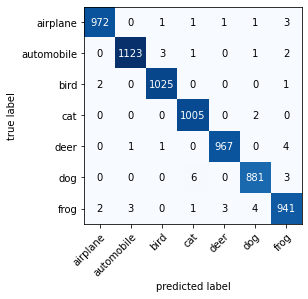

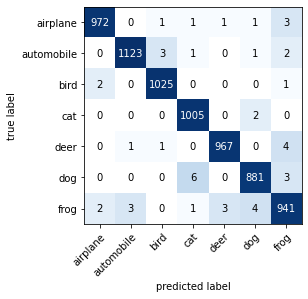

In [7]:
class_dict = {0: 'airplane',
              1: 'automobile',
              2: 'bird',
              3: 'cat',
              4: 'deer',
              5: 'dog',
              6: 'frog'}

cmat = np.array([[972, 0, 1, 1, 1, 1, 3],
                 [0, 1123, 3, 1, 0, 1, 2],
                 [2, 0, 1025, 0, 0, 0, 1],
                 [0, 0, 0, 1005, 0, 2, 0],
                 [0, 1, 1, 0, 967, 0, 4],
                 [0, 0, 0, 6, 0, 881, 3],
                 [2, 3, 0, 1, 3, 4, 941]])

fig, ax = plot_confusion_matrix(
    conf_mat=cmat,
    class_names=class_dict.values(),
)
fig, ax = plot_confusion_matrix(
    conf_mat=cmat,
    class_names=class_dict.values(),
    norm_colormap=matplotlib.colors.LogNorm()  
)

#### 만들어야 하는 함수 : counting 하는 함수
    인풋 :1. df_json_data_groun_truth -> game_time, label이 있는 dataframe
          2. df_json_data_prediction  -> game_time, label이 있는 dataframe
          나머지 데이터는 여기부터 필요 X
          
    아웃풋 : cmat에 숫자를 추가한 것

In [8]:
class_dict = {0 : 'Ball out of play',
              1 : 'Throw-in',
              2 : 'Foul',
              3 : 'Indirect free-kick',
              4 : 'Clearance',
              5 : 'Shots on target',
              6 : 'Shots off target',
              7 : 'Corner',
              8 : 'Substitution',
              9 : 'Kick-off',
              10 : 'Yellow card',
              11 : 'Offside',
              12 : 'Direct free-kick',
              13 : 'Goal',
              14 : 'Penalty',
              15 : 'Red card',
              16 : 'Start of game',
              17 : 'End of game',
              18 : 'Start of replay',
              19 : 'End of replay',
              20 : 'Yellow card -> red card',
              21 : 'Other',
              22 : 'NONE'}

In [9]:
# class_dict.reverse()
class_dict = dict(map(reversed,class_dict.items()))
print(type(class_dict))

<class 'dict'>


In [10]:
class_dict
print(len(class_dict))

23


In [11]:
cmat = np.array([0]*len(class_dict)*len(class_dict)).reshape((len(class_dict), len(class_dict)))
# cmat = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [12]:
# cmat

In [13]:
# print(size(cmat))
# print(cmat[0,0])
# print(cmat[0][0])

시간 비교를 위해 df_json_data_groun_truth, df_json_data_prediction의 Goal time을 지우고 MIN * 60 + Second로 Time label 추가.

In [14]:
df_json_data_groun_truth['MIN'] = df_json_data_groun_truth.gameTime.str.split(':').str[0]  # gameTime에서 분 추출
df_json_data_groun_truth['MIN'] = pd.to_numeric(df_json_data_groun_truth['MIN'])
df_json_data_groun_truth['SEC'] = df_json_data_groun_truth.gameTime.str.split(':').str[1]  # gameTime에서 초 추출
df_json_data_groun_truth['SEC'] = pd.to_numeric(df_json_data_groun_truth['SEC'])

In [15]:
df_json_data_groun_truth['Time'] = df_json_data_groun_truth['MIN']*60 + df_json_data_groun_truth['SEC']
df_json_data_groun_truth.drop(['gameTime', 'MIN', 'SEC'], axis=1, inplace=True)

df_json_data_prediction['Time'] = df_json_data_prediction['MIN']*60 + df_json_data_prediction['SEC']
df_json_data_prediction.drop(['gameTime', 'MIN', 'SEC'], axis=1, inplace=True)

df_json_data_prediction

,label,confidence,half,Time
0,Substitution,0.448288,1,4
1,Corner,0.896660,1,14
2,Ball out of play,0.550042,1,16
3,Kick-off,0.757758,1,31
4,Substitution,0.374071,1,63
...,...,...,...,...
651,Substitution,0.323211,2,6999
652,Kick-off,0.412479,2,7007
653,Goal,0.537783,2,7012
654,Kick-off,0.940929,2,7023


1. GT를 for문으로 지나면서 가장 가까운 predict을 찾기
    -> 가장 가까운 predict를 찾는 방법 ???????
2. 둘을 삭제하면서 cmat에 +1
    - 만약 초를 지났을 때 까지 없다면 pass : 일단 구현 안함.
3. 남은 predict(or GT)를 NONE과 매치하면서 +1

In [16]:
# df_json_data_prediction.drop(3, axis=0, inplace = True)
# df_json_data_prediction

##### 아래 코드 문제점 및 보완할 점
    1. for문의 인자인 j가 반복해서 나옴 -> 해결
    2. prediction의 row가 사용된 행일 경우 해당 행을 삭제
    3. time inteval에 대한 고려가 없음.

In [17]:
 df_json_data_prediction

,label,confidence,half,Time
0,Substitution,0.448288,1,4
1,Corner,0.896660,1,14
2,Ball out of play,0.550042,1,16
3,Kick-off,0.757758,1,31
4,Substitution,0.374071,1,63
...,...,...,...,...
651,Substitution,0.323211,2,6999
652,Kick-off,0.412479,2,7007
653,Goal,0.537783,2,7012
654,Kick-off,0.940929,2,7023


In [18]:
 df_json_data_prediction.reset_index(drop=True, inplace = True) # 인덱스 재설정

In [19]:
df_json_data_prediction

,label,confidence,half,Time
0,Substitution,0.448288,1,4
1,Corner,0.896660,1,14
2,Ball out of play,0.550042,1,16
3,Kick-off,0.757758,1,31
4,Substitution,0.374071,1,63
...,...,...,...,...
651,Substitution,0.323211,2,6999
652,Kick-off,0.412479,2,7007
653,Goal,0.537783,2,7012
654,Kick-off,0.940929,2,7023


In [20]:
df_json_data_groun_truth

,label,Time
0,Other,0
1,Shots on target,14
2,Goal,15
3,Goal,26
4,Direct free-kick,169
...,...,...
338,Goal,6996
339,Corner,7002
340,Goal,7006
341,Corner,7010


In [21]:
for i in df_json_data_groun_truth.index:
    min_time_diff = abs(df_json_data_groun_truth["Time"][i] - df_json_data_prediction["Time"][0])
    index = 0
    SUM = True
    for j in df_json_data_prediction.index:
#         print("GT is : ", df_json_data_groun_truth["Time"][i])
#         print("prediction is : ", df_json_data_prediction["Time"][j])
#         print("min_time_diff is :", min_time_diff)
        
        temp = abs(df_json_data_groun_truth["Time"][i] - df_json_data_prediction["Time"][j])
        if min_time_diff >= temp:
            
            min_time_diff = abs(df_json_data_groun_truth["Time"][i] - df_json_data_prediction["Time"][j])
        else :
            index = j
            if min_time_diff > 5:
                SUM = False
            break
            
    if SUM :
        x = class_dict.get(df_json_data_groun_truth["label"][i])
        y = class_dict.get(df_json_data_prediction["label"][index])

        cmat[x,y] += 1
        df_json_data_prediction.drop(index, inplace=True)
        df_json_data_prediction = df_json_data_prediction.reset_index(drop=True) # 인덱스 재설정

    else :
        x = class_dict.get(df_json_data_groun_truth["label"][i])
        cmat[x, 22] += 1


In [22]:
print(cmat)

[[18  3  0  0  4  1  2  2  8 22  0  0  0  0  0  0  0  0  0  0  0  0 17]
 [ 4  2  0  0  1  1  0  3  1 16  0  0  0  0  0  0  0  0  0  0  0  0 14]
 [ 3  0  0  0  2  0  0  1  1  6  0  0  0  0  0  0  0  0  0  0  0  0  9]
 [ 1  1  0  0  0  2  0  0  1  1  0  0  0  3  0  0  0  0  0  0  0  0 11]
 [ 0  0  1  0  0  0  0  0  1  8  0  0  0  1  0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  2  0  0  1  2  0  0  0  3  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  3  0  0  1  0  3  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 1  0  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  2  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  1  8  5  0  0  0  1  0  0  0  0  0  0  0

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


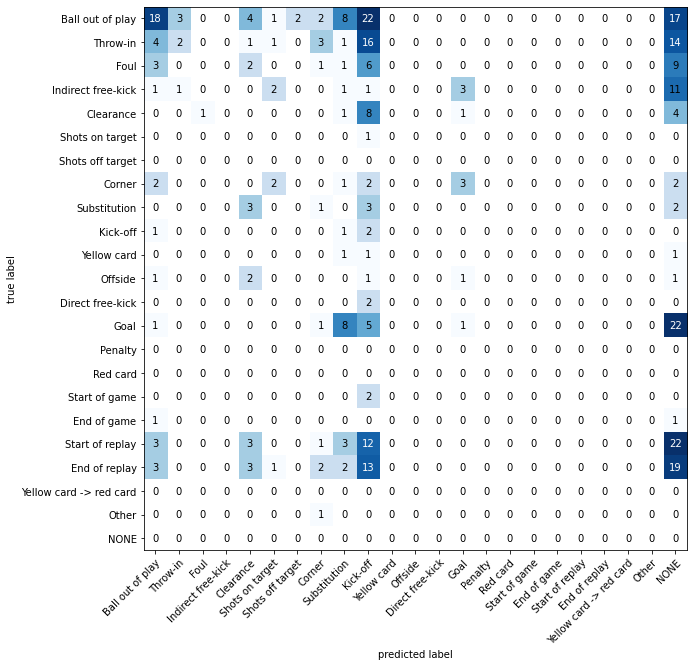

In [23]:
fig, ax = plot_confusion_matrix(
    conf_mat=cmat, figsize = (10, 10),
    class_names=class_dict.keys(),
    norm_colormap=matplotlib.colors.LogNorm()  
)

In [24]:
print(np.sum(cmat))

343


In [25]:
df_json_data_prediction
# GT 근처에 없어 남은 데이터들

,label,confidence,half,Time
0,Substitution,0.551063,1,80
1,Kick-off,0.417997,1,88
2,Substitution,0.371977,1,118
3,Substitution,0.514771,1,134
4,Kick-off,0.481013,1,155
...,...,...,...,...
433,Goal,0.880127,2,6996
434,Shots on target,0.395303,2,6996
435,Ball out of play,0.331837,2,6996
436,Kick-off,0.940929,2,7023
